In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [2]:
with open("bigpicklefile.pkl", 'r') as picklefile: 
    bigbaddata = pickle.load(picklefile)
    
bigbadpanda = pd.DataFrame(bigbaddata)
print 'Done here.'

Done here.


In [3]:
bigbadpanda['Tomato-meter'] = bigbadpanda['Tomato-meter'].astype(int)
bigbadpanda['Audience Score'] = bigbadpanda['Audience Score'].astype(int)

print "Tomato-meter distribs", '\n', bigbadpanda['Tomato-meter'].describe()
print '\n'
print "Audience Score distribs", '\n', bigbadpanda['Audience Score'].describe()

Tomato-meter distribs 
count    15032.000000
mean        61.146554
std         28.785893
min          0.000000
25%         38.000000
50%         67.000000
75%         86.000000
max        100.000000
Name: Tomato-meter, dtype: float64


Audience Score distribs 
count    15032.000000
mean        62.940261
std         20.622593
min          0.000000
25%         48.000000
50%         66.000000
75%         80.000000
max        100.000000
Name: Audience Score, dtype: float64


In [4]:
bigbadpanda['Year'] = bigbadpanda['Movie Title'].str[-5:-1].astype(int)

In [5]:
bigbadpanda.groupby(['Year']).agg({'Tomato-meter':[np.size, np.mean, np.std]})

Tomato-meter                       
             size        mean        std
Year                                    
1902            1  100.000000        NaN
1903            1  100.000000        NaN
1914            1  100.000000        NaN
1915            4   95.000000  10.000000
1916            1   97.000000        NaN
1919            3   98.333333   2.886751
1920            6   95.333333   5.750362
1921            4   94.750000   6.184658
1922            5   95.800000   4.764452
1923            6   93.833333   7.547627
1924            4   97.500000   3.000000
1925           10   95.300000   7.944949
1926            3   86.333333  17.214335
1927           10   93.100000  10.928556
1928           15   89.133333  15.788181
1929            9   84.666667  19.254870
1930           13   93.461538   7.113548
1931           12   92.666667  13.398326
1932           23   89.086957  15.655127
1933           30   87.000000  18.201932
1934           17   91.058824  11.305256
1935           17   87.823529  14.305748
1936           30   83.100000  24.195112
1937           22   91.818182  10.576868
1938           16   94.000000  10.589303
1939           29   93.241379  10.639063
1940           31   91.096774  10.290302
1941           30   91.500000  15.749658
1942           31   89.774194  13.445469
1943           20   81.800000  18.173433
...           ...         ...        ...
1987          175   61.022857  27.903148
1988          176   56.755682  30.330041
1989          188   56.452128  30.592768
1990          177   54.299435  29.749630
1991          181   53.900552  30.226020
1992          187   57.540107  29.569896
1993          237   55.594937  29.989342
1994          232   48.375000  30.394547
1995          254   54.885827  27.804348
1996          280   54.046429  29.684385
1997          288   52.135417  28.466847
1998          298   53.516779  27.245512
1999          338   53.423077  28.562935
2000          363   53.677686  27.393656
2001          415   56.279518  27.159912
2002          444   55.490991  26.845136
2003          430   57.065116  27.835605
2004          470   55.457447  28.589613
2005          511   56.792564  27.627282
2006          617   55.716370  27.511785
2007          668   58.931138  28.200366
2008          548   58.023723  26.963469
2009          507   56.153846  28.569795
2010          530   60.211321  27.363766
2011          649   60.747304  28.781814
2012          721   59.975035  28.591557
2013          736   60.656250  27.203792
2014          773   61.650712  28.656797
2015          507   61.560158  29.211066
2016            2   53.500000  50.204581

[103 rows x 3 columns]

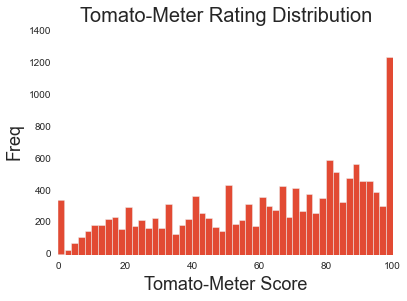

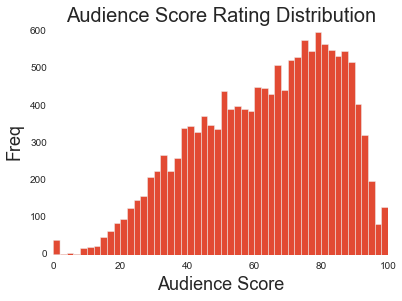

In [272]:
%matplotlib inline



bigbadpanda['Tomato-meter'].hist(bins = 50)
plt.title("Tomato-Meter Rating Distribution", fontsize = 20, y= 1.02)
plt.xlabel("Tomato-Meter Score", fontsize = 18)
plt.ylabel("Freq", fontsize = 18)
plt.savefig("Tom_Ratings_Histogram.png")
plt.show()

bigbadpanda['Audience Score'].hist(bins = 50)
plt.title("Audience Score Rating Distribution", fontsize = 20, y=1.02)
plt.xlabel("Audience Score", fontsize = 18)
plt.ylabel("Freq", fontsize = 18)
plt.savefig("Aud_Ratings_Histogram.png")
plt.show()

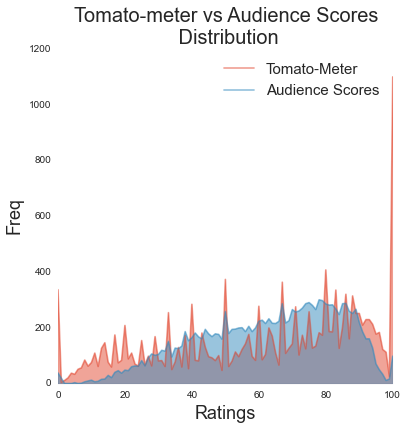

In [277]:
#Show the TM vs AS distribution via unstacked area charts.

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)

dfTom = bigbadpanda.groupby('Tomato-meter').size()
dfTom.plot(kind = "area", ax=ax, stacked = False, label="Tomato-Meter")

dfAud = bigbadpanda.groupby('Audience Score').size()
dfAud.plot(kind = "area", ax=ax, stacked = False, label="Audience Scores")

ax.set_xlabel("Ratings", fontsize = 18)
ax.set_ylabel("Freq", fontsize = 18)
ax.set_title("Tomato-meter vs Audience Scores \n Distribution", fontsize = 20)
ax.legend(fontsize = 15)

plt.savefig("TomAud_Stacked_Distrib.png")

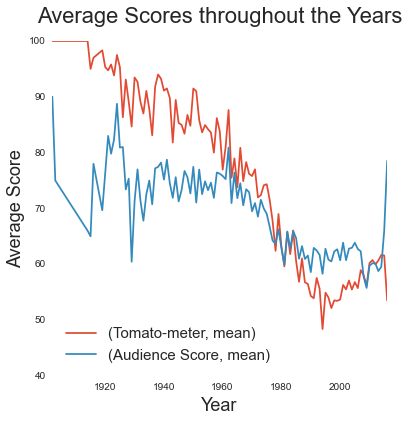

In [278]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)

average_tm = bigbadpanda.groupby(['Year']).agg({'Tomato-meter':[np.mean]})
average_tm.plot(ax=ax, legend=None, label = "Tomato-meter")

average_as = bigbadpanda.groupby(['Year']).agg({'Audience Score':[np.mean]})
average_as.plot(ax=ax, legend=None, label = "Audience Score")
ax.set_ylabel("Average Score", fontsize = 18)
ax.set_xlabel("Year", fontsize = 18)
ax.set_title("Average Scores throughout the Years", fontsize = 22, y= 1.04)
ax.legend(fontsize = 15, loc = 'lower left')

plt.savefig("Ratings_Through_Years.png")

In [14]:
bigbadpanda['Genres'] = bigbadpanda['Genres'].apply(tuple)
bigbadpanda['Actors'] = bigbadpanda['Actors'].apply(tuple)

# bigbadpanda.groupby(['Genres']).groups

print bigbadpanda.head()

                                              Actors  Audience Score  \
0  ( William Powell,  Myrna Loy,  Maureen O'Sulli...              94   
1  ( Jake T. Austin,  Raven,  Whoopi Goldberg,  R...              45   
2  ( Elina Löwensohn,  Olivier Gourmet,  Jonathan...              61   
3  ( Matti Pellonpää,  Kari Väänänen,  Jim Jarmus...              86   
4  ( Juliette Binoche,  Nikolaj Coster-Walda..., ...              65   

                Director                                             Genres  \
0          W.S. Van Dyke             (Mystery & Suspense, Classics, Comedy)   
1      Christopher Reeve  (Action & Adventure, Animation, Kids & Family,...   
2         Abdel Kechiche                 (Art House & International, Drama)   
3         Aki Kaurismäki  (Drama, Action & Adventure, Musical & Performi...   
4  Nikolaj Coster-Waldau                                           (Drama,)   

                           Movie Title  Tomato-meter  Year  
0                  The Thin Man

In [15]:
bigbadpanda['Rating Diff'] = bigbadpanda['Tomato-meter'] - bigbadpanda['Audience Score']
print bigbadpanda.sort(['Rating Diff'], ascending = False).head()

                                                  Actors  Audience Score  \
245                       ( James Ellroy,  Phil Tintner)               0   
13808  ( John Fahey,  Melody Fahey,  Terry Robb,  Pet...               0   
10700  ( Ranveer Singh,  Arjun Kapoor,  Irfan Khan,  ...               8   
3985   ( Moon Ye-Won,  Bong-Nam Park,  Lorne Oliver, ...               0   
9942   ( Cynthia Rothrock,  Seamus Dever,  Dan Lauria...               0   

               Director                                             Genres  \
245        Reinhard Jud                    (Documentary, Special Interest)   
13808  James Cullingham           (Musical & Performing Arts, Documentary)   
10700   Ali Abbas Zafar  (Drama, Action & Adventure, Romance, Art House...   
3985      Bong-Nam Park  (Documentary, Art House & International, Speci...   
9942      Jorge Montesi                   (Action & Adventure, Television)   

                                             Movie Title  Tomato-meter  Ye

In [16]:
bigbadpanda.to_csv("bigbadpanda.csv", sep='\t')
print 'Done here.'

Done here.


In [256]:
len(bigbadpanda)

15032

In [348]:
newpanda = bigbadpanda[['Genres', 'Tomato-meter', 'Audience Score', 'Director', 'Year']]

In [349]:
unpack_tuples_newpanda = newpanda.join(newpanda['Genres'].apply(lambda x: pd.Series(x)))
print unpack_tuples_newpanda.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score               Director  Year                          0  \
0              94          W.S. Van Dyke  1934         Mystery & Suspense   
1              45      Christopher Reeve  2006         Action & Adventure   
2              61         Abdel Kechiche  2011  Art House & International   
3              86         Aki Kaurismäki  1989                      Drama   
4              65  Nikolaj Coster-Waldau  2014                      Drama   

                    1                          2                          3  \
0            Classics                

In [350]:
dummy_cols_diff_newpanda = unpack_tuples_newpanda.columns.difference(unpack_tuples_newpanda[['Genres', 'Tomato-meter', 
                                                                        'Audience Score', 'Year', 'Director']].columns)
print dummy_cols_diff_newpanda

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [355]:
got_dummies_diff_newpanda = pd.get_dummies(unpack_tuples_newpanda[dummy_cols_diff_newpanda | pd.Index(['Audience Score', 'Tomato-meter', 'Year', 'Director'])], columns = dummy_cols_diff_newpanda) 
print got_dummies_diff_newpanda.head()

   Audience Score               Director  Tomato-meter  Year  \
0              94          W.S. Van Dyke            97  1934   
1              45      Christopher Reeve            41  2006   
2              61         Abdel Kechiche           100  2011   
3              86         Aki Kaurismäki           100  1989   
4              65  Nikolaj Coster-Waldau            74  2014   

   0_Action & Adventure  0_Animation  0_Art House & International  0_Classics  \
0                     0            0                            0           0   
1                     1            0                            0           0   
2                     0            0                            1           0   
3                     0            0                            0           0   
4                     0            0                            0           0   

   0_Comedy  0_Documentary             ...               4_Sports & Fitness  \
0         0              0             ...       

In [356]:
melted_newpanda = pd.melt(got_dummies_diff_newpanda, value_vars=got_dummies_diff_newpanda.columns.difference
                          (['Audience Score', 'Tomato-meter', 'Year', 'Director']).tolist(),
                          id_vars=['Audience Score', 'Tomato-meter', 'Year', 'Director'])
print melted_newpanda.head()

   Audience Score  Tomato-meter  Year               Director  \
0              94            97  1934          W.S. Van Dyke   
1              45            41  2006      Christopher Reeve   
2              61           100  2011         Abdel Kechiche   
3              86           100  1989         Aki Kaurismäki   
4              65            74  2014  Nikolaj Coster-Waldau   

               variable  value  
0  0_Action & Adventure      0  
1  0_Action & Adventure      1  
2  0_Action & Adventure      0  
3  0_Action & Adventure      0  
4  0_Action & Adventure      0  


In [357]:
melted_newpanda['variable'] = melted_newpanda.variable.str.replace(r'\d_', '')
print melted_newpanda.head()

   Audience Score  Tomato-meter  Year               Director  \
0              94            97  1934          W.S. Van Dyke   
1              45            41  2006      Christopher Reeve   
2              61           100  2011         Abdel Kechiche   
3              86           100  1989         Aki Kaurismäki   
4              65            74  2014  Nikolaj Coster-Waldau   

             variable  value  
0  Action & Adventure      0  
1  Action & Adventure      1  
2  Action & Adventure      0  
3  Action & Adventure      0  
4  Action & Adventure      0  


In [358]:
melted_newpanda = melted_newpanda.rename(columns={'variable':'Genre'})

In [361]:
scores_year_genre_dir = melted_newpanda[melted_newpanda.value != 0][['Audience Score', 'Tomato-meter',
                                                                     'Year', 'Genre', 'Director']]

In [363]:
scores_year_genre_dir.to_csv("scores_year_genre_dir.csv", sep='\t')
print 'Done here.'

Done here.


In [18]:
genrepanda = bigbadpanda[['Genres', 'Tomato-meter', 'Audience Score']]
print genrepanda.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  
0              94  
1              45  
2              61  
3              86  
4              65  


In [19]:
unpack_tuples_df = genrepanda.join(genrepanda['Genres'].apply(lambda x: pd.Series(x)))
print unpack_tuples_df.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score                          0                   1  \
0              94         Mystery & Suspense            Classics   
1              45         Action & Adventure           Animation   
2              61  Art House & International               Drama   
3              86                      Drama  Action & Adventure   
4              65                      Drama                 NaN   

                           2                          3       4    5    6    7  
0                     Comedy                        NaN     NaN  NaN  NaN  NaN  
1       

In [20]:
dummy_cols = unpack_tuples_df.columns.difference(unpack_tuples_df[['Genres', 'Tomato-meter', 'Audience Score']].columns)
print 'Done here.'

Done here.


In [341]:
got_dummies_df = pd.get_dummies(unpack_tuples_df[dummy_cols | pd.Index(['Audience Score', 'Tomato-meter'])]) 
print got_dummies_df.head()

   Audience Score  Tomato-meter  0_Action & Adventure  0_Animation  \
0              94            97                     0            0   
1              45            41                     1            0   
2              61           100                     0            0   
3              86           100                     0            0   
4              65            74                     0            0   

   0_Art House & International  0_Classics  0_Comedy  0_Documentary  0_Drama  \
0                            0           0         0              0        0   
1                            0           0         0              0        0   
2                            1           0         0              0        0   
3                            0           0         0              0        1   
4                            0           0         0              0        1   

   0_Faith & Spirituality             ...               4_Sports & Fitness  \
0                   

In [342]:
melted_df = pd.melt(got_dummies_df, value_vars=got_dummies_df.columns.difference(['Audience Score', 'Tomato-meter']).tolist(), id_vars=['Audience Score', 'Tomato-meter'])
print melted_df.head()

   Audience Score  Tomato-meter              variable  value
0              94            97  0_Action & Adventure      0
1              45            41  0_Action & Adventure      1
2              61           100  0_Action & Adventure      0
3              86           100  0_Action & Adventure      0
4              65            74  0_Action & Adventure      0


In [24]:
print melted_df.head()

   Audience Score  Tomato-meter              variable  value
0              94            97  0_Action & Adventure      0
1              45            41  0_Action & Adventure      1
2              61           100  0_Action & Adventure      0
3              86           100  0_Action & Adventure      0
4              65            74  0_Action & Adventure      0


In [25]:
melted_df['variable'] = melted_df.variable.str.replace(r'\d_', '')
print melted_df.head()

   Audience Score  Tomato-meter            variable  value
0              94            97  Action & Adventure      0
1              45            41  Action & Adventure      1
2              61           100  Action & Adventure      0
3              86           100  Action & Adventure      0
4              65            74  Action & Adventure      0


In [27]:
grouped_genres_series = melted_df[melted_df.value != 0].groupby('variable')['value'].sum()
print grouped_genres_series

variable
Action & Adventure           2824
Adult                           3
Animation                     473
Anime & Manga                  22
Art House & International    2903
Classics                     1490
Comedy                       5240
Cult Movies                   101
Documentary                  1785
Drama                        8605
Faith & Spirituality           92
Gay & Lesbian                  78
Horror                       1520
Kids & Family                 934
Musical & Performing Arts     994
Mystery & Suspense           2811
Romance                      1769
Science Fiction & Fantasy    1548
Special Interest             1395
Sports & Fitness              167
Television                    308
Western                       221
Name: value, dtype: float64


In [28]:
ordered_genre_counts_series = grouped_genres_series.order(ascending = True)
print ordered_genre_counts_series.head()

variable
Adult                     3
Anime & Manga            22
Gay & Lesbian            78
Faith & Spirituality     92
Cult Movies             101
Name: value, dtype: float64


In [29]:
print "Genres are listed", grouped_genres_series.sum(), "times.", '\n' 

print "There are", len(bigbadpanda), "total unique movies on RottenTomatoes.", '\n' 

print "So, your average Rotten Tomato movie is characterized under", (grouped_genres_series.sum()) / len(bigbadpanda), "genres.", '\n' 

# (grouped_genres_series.sum()) / len(bigbadpanda)

Genres are listed 35283.0 times. 

There are 15032 total unique movies on RottenTomatoes. 

So, your average Rotten Tomato movie is characterized under 2.34719265567 genres. 



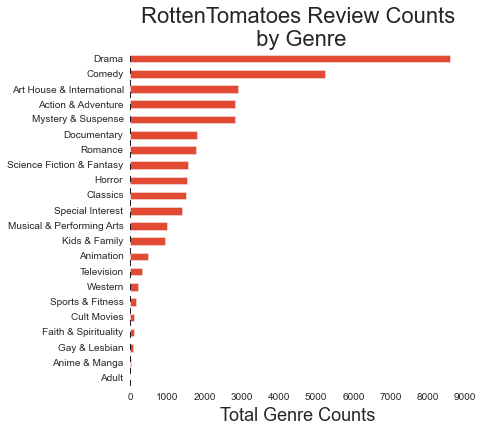

In [283]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
ordered_genre_counts_series.plot(kind="barh")
ax.set_ylabel("")
ax.set_xlabel("Total Genre Counts", fontsize = 18)
ax.set_title("RottenTomatoes Review Counts\n by Genre", fontsize = 22)



In [33]:
#The 'Rating Difference' column is the how much greater or less the critics' tomato score was
#than the everyman's audience score for the movie.

genrepanda['Rating Difference'] = genrepanda['Tomato-meter'] - genrepanda['Audience Score']
print genrepanda.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  Rating Difference  
0              94                  3  
1              45                 -4  
2              61                 39  
3              86                 14  
4              65                  9  


/Users/yongcho822/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
unpack_tuples_df = genrepanda.join(genrepanda['Genres'].apply(lambda x: pd.Series(x)))
print unpack_tuples_df.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  Rating Difference                          0  \
0              94                  3         Mystery & Suspense   
1              45                 -4         Action & Adventure   
2              61                 39  Art House & International   
3              86                 14                      Drama   
4              65                  9                      Drama   

                    1                          2                          3  \
0            Classics                     Comedy                        NaN   
1           Animat

In [35]:
dummy_cols_diff = unpack_tuples_df.columns.difference(unpack_tuples_df[['Genres', 'Tomato-meter', 'Audience Score', 'Rating Difference']].columns)

In [36]:
got_dummies_df_diff = pd.get_dummies(unpack_tuples_df[dummy_cols_diff | pd.Index(['Audience Score', 'Tomato-meter', 'Rating Difference'])])

In [37]:
melted_df_diff = pd.melt(got_dummies_df_diff, value_vars=got_dummies_df_diff.columns.difference(['Audience Score', 'Tomato-meter', "Rating Difference"]).tolist(), id_vars=['Audience Score', 'Tomato-meter', 'Rating Difference'])

In [38]:
melted_df_diff['variable'] = melted_df_diff.variable.str.replace(r'\d_', '')
print melted_df_diff.shape

(1533264, 5)


In [39]:
print melted_df_diff[melted_df_diff.value != 0].head()

    Audience Score  Tomato-meter  Rating Difference            variable  value
1               45            41                 -4  Action & Adventure      1
9               44            53                  9  Action & Adventure      1
13              61            75                 14  Action & Adventure      1
18              50             8                -42  Action & Adventure      1
25              80            62                -18  Action & Adventure      1


In [40]:
just_diff_and_genre_df = melted_df_diff[melted_df_diff.value != 0][['Rating Difference', 'variable']]

In [41]:
print just_diff_and_genre_df.head()

print type(just_diff_and_genre_df)

    Rating Difference            variable
1                  -4  Action & Adventure
9                   9  Action & Adventure
13                 14  Action & Adventure
18                -42  Action & Adventure
25                -18  Action & Adventure
<class 'pandas.core.frame.DataFrame'>


In [42]:
grouped_genres_series_diff = melted_df_diff[melted_df_diff.value != 0].groupby('variable')

In [43]:
grouped_genres_series_diff['Rating Difference'].describe()

variable                 
Action & Adventure  count    2824.000000
                    mean       -4.844193
                    std        21.082983
                    min       -80.000000
                    25%       -19.000000
                    50%        -3.000000
                    75%         9.000000
                    max        92.000000
Adult               count       3.000000
                    mean        1.666667
                    std         6.506407
                    min        -5.000000
                    25%        -1.500000
                    50%         2.000000
                    75%         5.000000
...
Television  mean       2.814935
            std       19.721551
            min      -75.000000
            25%       -6.250000
            50%        6.000000
            75%       14.000000
            max       86.000000
Western     count    221.000000
            mean       4.248869
            std       20.423617
            min      -67.000000
   

In [44]:
sort_for_seaborn = just_diff_and_genre_df.sort(["Rating Difference"], ascending = False)
sort_for_seaborn.head()

,Rating Difference,variable
419672,100,Documentary
179160,100,Musical & Performing Arts
75405,100,Documentary
556429,100,Special Interest
296308,92,Action & Adventure


In [45]:
sort_for_seaborn.variable.nunique()

22

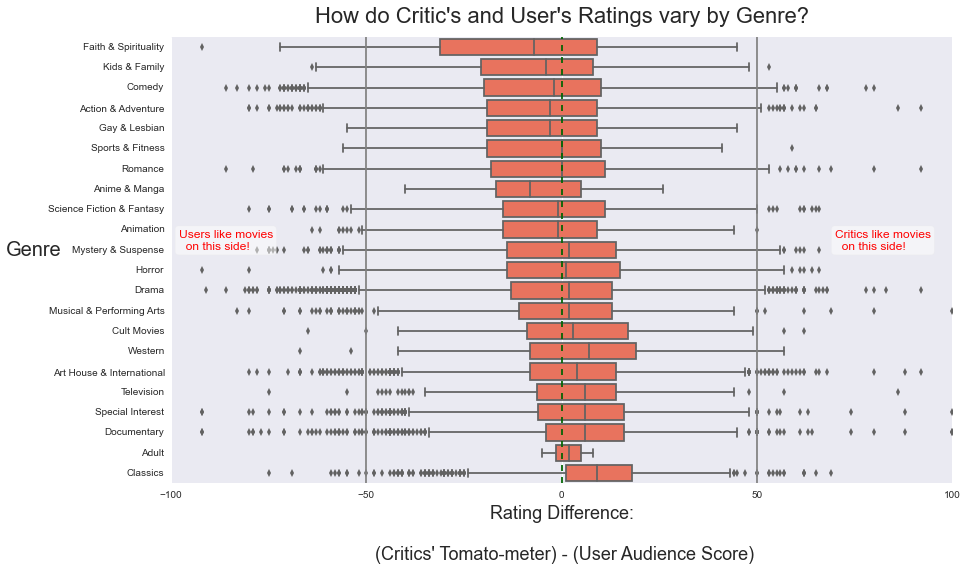

In [325]:
#seaborn stripplot: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html#seaborn.stripplot

sns.set_style("darkgrid")

plt.figure(figsize=(14, 8))
ax = sns.boxplot(x=just_diff_and_genre_df["Rating Difference"], y=just_diff_and_genre_df.variable, order = ['Faith & Spirituality', 'Kids & Family', 'Comedy', 'Action & Adventure', 'Gay & Lesbian', 'Sports & Fitness',
         'Romance','Anime & Manga','Science Fiction & Fantasy','Animation','Mystery & Suspense','Horror', 'Drama', 
         'Musical & Performing Arts', 'Cult Movies', 'Western','Art House & International', 'Television', 
         'Special Interest', 'Documentary', 'Adult', 'Classics'], color = 'tomato')


ax.set_xlabel("Rating Difference: \n \n (Critics' Tomato-meter) - (User Audience Score)", fontsize = 18)
h = ax.set_ylabel("Genre", fontsize = 20, labelpad = 14)
h.set_rotation(0)
ax.set_xlim(-100,100)
ax.axvline(x=0, color = 'darkgreen', ls = "--")
ax.axvline(x=50, color = 'grey')
ax.axvline(x=-50, color = 'grey')
plt.title("How do Critic's and User's Ratings vary by Genre?", fontsize = 22, y=1.02)

textstr = ('Users like movies\n  on this side!')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(-98, 9, textstr, fontsize=12,
        verticalalignment='top', color="red", bbox=props)

textstr = ('Critics like movies\n  on this side!')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(70, 9, textstr, fontsize=12,
        verticalalignment='top', color="red", bbox=props)

# plt.savefig("Genre_Boxplot_Seaborn.png")

In [47]:
model_df = melted_df_diff[melted_df_diff.value != 0][["Audience Score", "Tomato-meter", "variable"]]
print model_df.head()

    Audience Score  Tomato-meter            variable
1               45            41  Action & Adventure
9               44            53  Action & Adventure
13              61            75  Action & Adventure
18              50             8  Action & Adventure
25              80            62  Action & Adventure


In [48]:
model_df.to_csv("Scores_Ratings_Genres.csv", sep='\t')
print 'Done here.'

Done here.


In [ ]:
f

In [49]:
from patsy import dmatrices

y, X = dmatrices('Q("Audience Score") ~ Q("Tomato-meter") + variable', data=model_df, return_type='dataframe')

y.head()

,"Q(""Audience Score"")"
1,45
9,44
13,61
18,50
25,80


In [50]:
X.head()

,Intercept,variable[T.Adult],variable[T.Animation],variable[T.Anime & Manga],variable[T.Art House & International],variable[T.Classics],variable[T.Comedy],variable[T.Cult Movies],variable[T.Documentary],variable[T.Drama],...,variable[T.Kids & Family],variable[T.Musical & Performing Arts],variable[T.Mystery & Suspense],variable[T.Romance],variable[T.Science Fiction & Fantasy],variable[T.Special Interest],variable[T.Sports & Fitness],variable[T.Television],variable[T.Western],"Q(""Tomato-meter"")"
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,53
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75
18,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
25,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,62


In [51]:
import statsmodels.api as sm

In [52]:
model = sm.OLS(y, X)
results = model.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q("Audience Score")   R-squared:                       0.465
Model:                             OLS   Adj. R-squared:                  0.465
Method:                  Least Squares   F-statistic:                     1394.
Date:                 Tue, 14 Jul 2015   Prob (F-statistic):               0.00
Time:                         11:41:34   Log-Likelihood:            -1.4532e+05
No. Observations:                35283   AIC:                         2.907e+05
Df Residuals:                    35260   BIC:                         2.909e+05
Df Model:                           22                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
Intercept                                34.1641      0.322    106.025      0.000        33.533    34.796
variable[T.Adult]                        -7.2796      8.597     -0.847      0.397       -24.129     9.570
variable[T.Animation]                     3.4488      0.740      4.662      0.000         1.999     4.899
variable[T.Anime & Manga]                 7.5825      3.185      2.380      0.017         1.339    13.826
variable[T.Art House & International]     2.2036      0.397      5.557      0.000         1.426     2.981
variable[T.Classics]                      1.4466      0.483      2.996      0.003         0.500     2.393
variable[T.Comedy]                        0.5688      0.347      1.637      0.102        -0.112     1.250
variable[T.Cult Movies]                  -5.0719      1.507     -3.365      0.001        -8.026    -2.118
variable[T.Documentary]                   3.4942      0.455      7.673      0.000         2.602     4.387
variable[T.Drama]                         1.7175      0.324      5.299      0.000         1.082     2.353
variable[T.Faith & Spirituality]          6.7987      1.577      4.312      0.000         3.708     9.889
variable[T.Gay & Lesbian]                 0.2843      1.708      0.166      0.868        -3.064     3.632
variable[T.Horror]                       -8.3101      0.474    -17.545      0.000        -9.238    -7.382
variable[T.Kids & Family]                 1.1895      0.562      2.118      0.034         0.089     2.291
variable[T.Musical & Performing Arts]     4.8142      0.551      8.737      0.000         3.734     5.894
variable[T.Mystery & Suspense]           -3.2246      0.397     -8.132      0.000        -4.002    -2.447
variable[T.Romance]                       2.5416      0.452      5.627      0.000         1.656     3.427
variable[T.Science Fiction & Fantasy]    -1.9081      0.471     -4.054      0.000        -2.831    -0.986
variable[T.Special Interest]              3.2272      0.491      6.570      0.000         2.264     4.190
variable[T.Sports & Fitness]              6.7083      1.186      5.656      0.000         4.384     9.033
variable[T.Television]                    0.9032      0.894      1.010      0.312        -0.850     2.656
variable[T.Western]                       0.0298      1.041      0.029      0.977        -2.010     2.070
Q("Tomato-meter")                         0.4613      0.003    157.524      0.000         0.456     0.467
==============================================================================
Omnibus:                      996.142   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1435.944
Skew:                          -0.303   Prob(JB):                         0.00


In [54]:
testreginput = str(results.params.order().index)
results.params.order()

variable[T.Horror]                       -8.310052
variable[T.Adult]                        -7.279615
variable[T.Cult Movies]                  -5.071878
variable[T.Mystery & Suspense]           -3.224572
variable[T.Science Fiction & Fantasy]    -1.908058
variable[T.Western]                       0.029806
variable[T.Gay & Lesbian]                 0.284294
Q("Tomato-meter")                         0.461299
variable[T.Comedy]                        0.568762
variable[T.Television]                    0.903188
variable[T.Kids & Family]                 1.189547
variable[T.Classics]                      1.446589
variable[T.Drama]                         1.717501
variable[T.Art House & International]     2.203573
variable[T.Romance]                       2.541630
variable[T.Special Interest]              3.227217
variable[T.Animation]                     3.448795
variable[T.Documentary]                   3.494215
variable[T.Musical & Performing Arts]     4.814208
variable[T.Sports & Fitness]   

In [55]:
# import re
# reg = re.compile(r'(?<=T\.)([^\]]+)', testreginput)
# print reg

In [56]:
mediumpanda = bigbadpanda[['Genres', 'Tomato-meter', 'Audience Score', 'Year']]

In [57]:
print mediumpanda.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  Year  
0              94  1934  
1              45  2006  
2              61  2011  
3              86  1989  
4              65  2014  


In [58]:
unpack_tuples_df2 = mediumpanda.join(mediumpanda['Genres'].apply(lambda x: pd.Series(x)))
print unpack_tuples_df2.head()

                                              Genres  Tomato-meter  \
0             (Mystery & Suspense, Classics, Comedy)            97   
1  (Action & Adventure, Animation, Kids & Family,...            41   
2                 (Art House & International, Drama)           100   
3  (Drama, Action & Adventure, Musical & Performi...           100   
4                                           (Drama,)            74   

   Audience Score  Year                          0                   1  \
0              94  1934         Mystery & Suspense            Classics   
1              45  2006         Action & Adventure           Animation   
2              61  2011  Art House & International               Drama   
3              86  1989                      Drama  Action & Adventure   
4              65  2014                      Drama                 NaN   

                           2                          3       4    5    6    7  
0                     Comedy                        N

In [59]:
dummy_cols_diff2 = unpack_tuples_df2.columns.difference(unpack_tuples_df2[['Genres', 'Tomato-meter', 
                                                                        'Audience Score', 'Year']].columns)
print dummy_cols_diff2

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [60]:
got_dummies_df_diff2 = pd.get_dummies(unpack_tuples_df2[dummy_cols_diff2 | pd.Index(['Audience Score', 'Tomato-meter', 
                                                                                   'Year'])]) 
print got_dummies_df_diff2.head()

   Audience Score  Tomato-meter  Year  0_Action & Adventure  0_Animation  \
0              94            97  1934                     0            0   
1              45            41  2006                     1            0   
2              61           100  2011                     0            0   
3              86           100  1989                     0            0   
4              65            74  2014                     0            0   

   0_Art House & International  0_Classics  0_Comedy  0_Documentary  0_Drama  \
0                            0           0         0              0        0   
1                            0           0         0              0        0   
2                            1           0         0              0        0   
3                            0           0         0              0        1   
4                            0           0         0              0        1   

              ...               4_Sports & Fitness  5_Drama  5

In [67]:
melted_df_diff2 = pd.melt(got_dummies_df_diff2, value_vars=got_dummies_df_diff2.columns.difference
                         (['Audience Score', 'Tomato-meter', "Year"]).tolist(), 
                         id_vars=['Audience Score', 'Tomato-meter', 'Year'])

In [68]:
melted_df_diff2.head()

,Audience Score,Tomato-meter,Year,variable,value
0,94,97,1934,0_Action & Adventure,0
1,45,41,2006,0_Action & Adventure,1
2,61,100,2011,0_Action & Adventure,0
3,86,100,1989,0_Action & Adventure,0
4,65,74,2014,0_Action & Adventure,0


In [69]:
melted_df_diff2['variable'] = melted_df_diff2.variable.str.replace(r'\d_', '')
print melted_df_diff2.shape

(1533264, 5)


In [70]:
scores_year_genre = melted_df_diff2[melted_df_diff2.value != 0][['Audience Score', 'Tomato-meter',
                                                                     'Year', 'variable']]

In [71]:
scores_year_genre.to_csv("scores_year_genre.csv", sep='\t')
print 'Done here.'

Done here.


In [265]:
print bigbadpanda.groupby(["Director"])['Rating Diff'].mean().order()

Director
R Torjan              -92
Andrew Marcus         -92
Shundell Prasad       -91
Ian Thorpe            -83
Steven Goldmann       -81
Salomé Breziner       -80
R. J. Kizer           -80
Briggite Cornand      -80
Raj Amit Kumar        -79
Sylvie Verheyde       -79
Andy Humphries (II)   -78
John Sullivan         -77
Brendan Malloy        -76
Rachel Goldenberg     -75
Gordon Flemyng        -75
...
Matías Piñeiro         62
Yasuaki Nakajima       62
David Ormont           62
Gil Kofman             63
Christopher Felver     64
Ben Rock               66
Valérie Massadian      67
Harry Basil            68
Tom Shepard            74
Stewart Svaasand       78
Charlotte Purdy        80
Bong-Nam Park          88
Ali Abbas Zafar        92
Reinhard Jud          100
James Cullingham      100
Name: Rating Diff, Length: 7496, dtype: float64


In [72]:
print bigbadpanda.groupby(["Director"]).size().count()

7496


In [73]:
#seeing summary count of movies per director

print bigbadpanda.groupby(["Director"]).size().value_counts()

1     5094
2     1096
3      417
4      251
5      164
6      114
7       79
8       55
9       51
10      36
11      26
13      19
14      16
12      15
16      10
15      10
18       8
17       7
19       5
21       5
20       3
23       3
22       3
24       2
29       2
25       2
32       1
44       1
38       1
dtype: int64


In [74]:
# Grouping by Directors with more than 10 movies.

director_counts = bigbadpanda.groupby(["Director"])
director_counts_over_10 = director_counts.filter(lambda x: len(x) > 10)
print type(director_counts_over_10), '\n'
print director_counts_over_10.groupby(["Director"]).size()
# 139 Directors have directed more than 10 films

<class 'pandas.core.frame.DataFrame'> 

Director
Abel Ferrara           16
Akira Kurosawa         18
Alan J. Pakula         11
Alan Parker            14
Alex Gibney            11
Alfred Hitchcock       38
Ang Lee                11
Anthony Mann           14
Arthur Hiller          16
Barry Levinson         21
Bernardo Bertolucci    12
Billy Wilder           23
Blake Edwards          21
Brian DePalma          13
Bruce Beresford        17
...
Takashi Miike        13
Terry Gilliam        12
Tim Burton           15
Tony Scott           14
Tyler Perry          14
Vincente Minnelli    14
Walter Hill          18
Werner Herzog        25
Wes Craven           18
William Friedkin     14
William Wellman      12
William Wyler        19
Wim Wenders          13
Woody Allen          44
Yimou Zhang          11
Length: 139, dtype: int64


In [75]:
director_tomatoes = director_counts_over_10.groupby(["Director"]).agg({'Tomato-meter':[np.mean]})["Tomato-meter"]["mean"].order(ascending = False)
print director_tomatoes.head()

Director
Luis Buñuel       94.923077
William Wyler     93.947368
Frank Capra       92.909091
Anthony Mann      92.785714
Hayao Miyazaki    92.363636
Name: mean, dtype: float64


In [76]:
director_audience = director_counts_over_10.groupby(["Director"]).agg({'Audience Score':[np.mean]})["Audience Score"]["mean"].order(ascending = False)
print director_audience.head()

Director
Hayao Miyazaki      90.090909
Akira Kurosawa      85.944444
William Wyler       85.789474
Federico Fellini    84.000000
David Lean          83.636364
Name: mean, dtype: float64


In [77]:
director_combined_ratings = pd.concat([director_tomatoes, director_audience], axis = 1)
director_combined_ratings.columns = ['Av Tomato-meter','Av Audience Score']
director_combined_ratings['Combined Score'] = director_combined_ratings['Av Tomato-meter'] + director_combined_ratings['Av Audience Score']
director_combined_ratings['Rating Diff'] = director_combined_ratings['Av Tomato-meter'] - director_combined_ratings['Av Audience Score']

print director_combined_ratings[director_combined_ratings.index == 'Judd Apatow']

Empty DataFrame
Columns: [Av Tomato-meter, Av Audience Score, Combined Score, Rating Diff]
Index: []


In [78]:
print director_combined_ratings['Av Tomato-meter'].order()[80:]

Woody Allen                 73.227273
Martin Ritt                 73.461538
Michel Gondry               73.636364
Sam Raimi                   73.642857
Mike Nichols                73.714286
David Cronenberg            74.000000
Steven Soderbergh           74.521739
Tim Burton                  74.666667
Jim Jarmusch                75.454545
Yimou Zhang                 75.545455
François Ozon               76.400000
Peter Jackson               76.538462
Jean-Luc Godard             76.818182
Roman Polanski              77.000000
Robert Aldrich              77.750000
Robert Altman               77.916667
Stephen Frears              78.000000
Steven Spielberg            78.206897
Nicholas Ray                79.083333
John Sayles                 80.200000
Louis Malle                 80.363636
Ang Lee                     80.636364
Jonathan Demme              80.944444
Pedro Almodóvar             81.133333
Peter Weir                  81.461538
John Sturges                81.750000
Richard Link

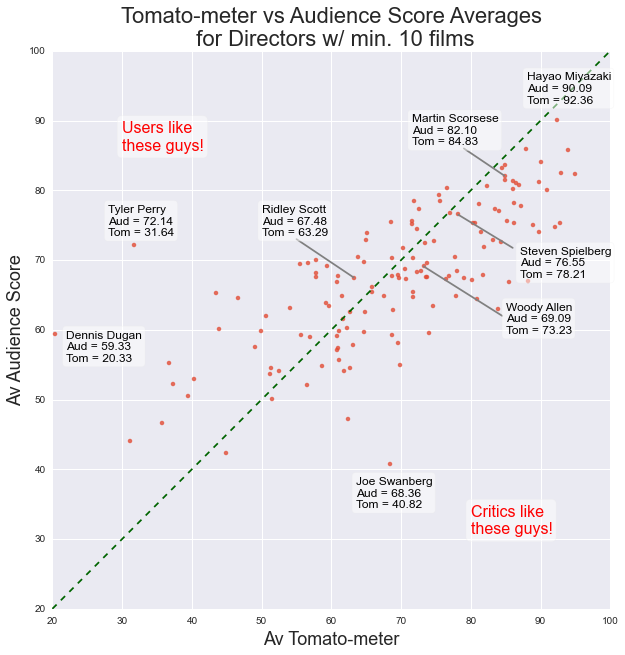

In [287]:
# ax = sns.jointplot(x="Av Tomato-meter", y="Av Audience Score", data=director_combined_ratings, stat_func = None, 
#                    size = 8, xlim=(0,100), ylim=(0,100))
# ax.plot(100, 100)
# ax.title = "Average Tomato-meter vs Audience Score for Directors with over 10 Movies"

# g = sns.JointGrid(x="Av Tomato-meter", y="Av Audience Score", data=director_combined_ratings,
#                   xlim=(20,100), ylim=(20,100), size = 8)
# g = g.plot_joint(plt.scatter,color="r", s=25, edgecolor="white")
# g = g.plot_marginals(sns.distplot, kde=False, color="r")
# g = g.plot([20,100], [20,100])

plt.figure(figsize=(10, 10))
plt.title("Tomato-meter vs Audience Score Averages\n for Directors w/ min. 10 films", fontsize = 22)

ax = sns.regplot(x="Av Tomato-meter", y="Av Audience Score", data=director_combined_ratings, fit_reg = False)
ax.set_xlim(20,100)
ax.set_ylim(20,100)
ax.plot([20,100], [20,100], ls = "--", c= 'darkgreen')

ax.set_xlabel("Av Tomato-meter", fontsize = 18)
ax.set_ylabel("Av Audience Score", fontsize = 18)

textstr = ('Tyler Perry' '\n' 'Aud = 72.14''\n' 'Tom = 31.64')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(28, 78, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)

textstr = ('Joe Swanberg' '\n' 'Aud = 68.36''\n' 'Tom = 40.82')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(63.5, 39, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)

textstr = ('Dennis Dugan' '\n' 'Aud = 59.33''\n' 'Tom = 20.33')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(22, 60, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)

textstr = ('Hayao Miyazaki' '\n' 'Aud = 90.09''\n' 'Tom = 92.36')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(88, 97, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)

textstr = ('Martin Scorsese' '\n' 'Aud = 82.10''\n' 'Tom = 84.83')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(71.5, 91, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)
ax.plot([79,84.8], [86,82.1], ls = "-", c= 'grey')

textstr = ('Ridley Scott' '\n' 'Aud = 67.48''\n' 'Tom = 63.29')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(50, 78, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)
ax.plot([55,63.2], [73,67.5], ls = "-", c= 'grey')

textstr = ('Steven Spielberg' '\n' 'Aud = 76.55''\n' 'Tom = 78.21')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(87, 72, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)
ax.plot([78.2,86], [76.5,71.75], ls = "-", c= 'grey')

textstr = ('Woody Allen' '\n' 'Aud = 69.09''\n' 'Tom = 73.23')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(85, 64, textstr, fontsize=12,
        verticalalignment='top', color="black", bbox=props)
ax.plot([73.23,84.5], [69.09,62], ls = "-", c= 'grey')

textstr = ('Critics like' '\n' 'these guys!')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(80, 35, textstr, fontsize=16,
        verticalalignment='top', color="red", bbox=props)

textstr = ('Users like' '\n' 'these guys!')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(30, 90, textstr, fontsize=16,
        verticalalignment='top', color="red", bbox=props)

plt.savefig("Directors_Scatterplot")

In [80]:
scores_year_genre = scores_year_genre.rename(columns={'variable':'Genre'})

In [247]:
y1, X1 = dmatrices('Q("Audience Score") ~ Year + I(Year**2) + Q("Tomato-meter") + Genre',
                   data=scores_year_genre, return_type='dataframe')

In [248]:
y1.head()

,"Q(""Audience Score"")"
1,45
9,44
13,61
18,50
25,80


In [249]:
X1.head()

,Intercept,Genre[T.Adult],Genre[T.Animation],Genre[T.Anime & Manga],Genre[T.Art House & International],Genre[T.Classics],Genre[T.Comedy],Genre[T.Cult Movies],Genre[T.Documentary],Genre[T.Drama],...,Genre[T.Mystery & Suspense],Genre[T.Romance],Genre[T.Science Fiction & Fantasy],Genre[T.Special Interest],Genre[T.Sports & Fitness],Genre[T.Television],Genre[T.Western],Year,I(Year ** 2),"Q(""Tomato-meter"")"
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2006,4024036,41
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1973,3892729,53
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1992,3968064,75
18,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2013,4052169,8
25,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2015,4060225,62


In [250]:
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Q("Audience Score")   R-squared:                       0.471
Model:                             OLS   Adj. R-squared:                  0.470
Method:                  Least Squares   F-statistic:                     1307.
Date:                 Tue, 14 Jul 2015   Prob (F-statistic):               0.00
Time:                         15:41:57   Log-Likelihood:            -1.4514e+05
No. Observations:                35283   AIC:                         2.903e+05
Df Residuals:                    35258   BIC:                         2.905e+05
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                          -1.134e+04    651.403    -17.414      0.000     -1.26e+04 -1.01e+04
Genre[T.Adult]                        -7.5059      8.552     -0.878      0.380       -24.268     9.256
Genre[T.Animation]                     4.0297      0.737      5.468      0.000         2.585     5.474
Genre[T.Anime & Manga]                 7.2553      3.169      2.289      0.022         1.044    13.467
Genre[T.Art House & International]     2.5303      0.395      6.399      0.000         1.755     3.305
Genre[T.Classics]                      1.1157      0.502      2.221      0.026         0.131     2.100
Genre[T.Comedy]                        0.7476      0.346      2.162      0.031         0.070     1.425
Genre[T.Cult Movies]                  -6.2719      1.501     -4.179      0.000        -9.214    -3.330
Genre[T.Documentary]                   4.7883      0.461     10.384      0.000         3.885     5.692
Genre[T.Drama]                         2.0602      0.323      6.378      0.000         1.427     2.693
Genre[T.Faith & Spirituality]          7.3103      1.569      4.660      0.000         4.236    10.385
Genre[T.Gay & Lesbian]                 0.5182      1.700      0.305      0.760        -2.813     3.850
Genre[T.Horror]                       -8.2758      0.471    -17.563      0.000        -9.199    -7.352
Genre[T.Kids & Family]                 1.2539      0.559      2.244      0.025         0.159     2.349
Genre[T.Musical & Performing Arts]     5.2160      0.549      9.509      0.000         4.141     6.291
Genre[T.Mystery & Suspense]           -3.0010      0.395     -7.604      0.000        -3.774    -2.227
Genre[T.Romance]                       2.7003      0.450      6.006      0.000         1.819     3.582
Genre[T.Science Fiction & Fantasy]    -1.9904      0.468     -4.251      0.000        -2.908    -1.073
Genre[T.Special Interest]              4.3662      0.494      8.831      0.000         3.397     5.335
Genre[T.Sports & Fitness]              7.7679      1.182      6.572      0.000         5.451    10.085
Genre[T.Television]                    1.1424      0.890      1.283      0.200        -0.603     2.888
Genre[T.Western]                      -0.4995      1.037     -0.481      0.630        -2.533     1.534
Year                                  11.5296      0.658     17.524      0.000        10.240    12.819
I(Year ** 2)                          -0.0029      0.000    -17.579      0.000        -0.003    -0.003
Q("Tomato-meter")                      0.4581      0.003    149.681      0.000         0.452     0.464
==============================================================================
Omnibus:                      959.982   Durbin-Watson:                   2.009
Prob(Omnibus):                

In [252]:
# predictthis = [["Horror", 2015, 80]]
# predictthis = pd.DataFrame(predictthis, columns = ["Genre", "Year", "Tomato-meter"])

# results1.predict(predictthis)

# this is ant man - it got 72
results1.predict([1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2015,4060225,72])
#4060225


#this is minions - it got 60, this predicts 62
#results1.predict([1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2015,54])


#this is inside out - it got 98
#results1.predict([1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2015,98])

array([ 60.32706218])

In [167]:
len(results1.predict())

35283

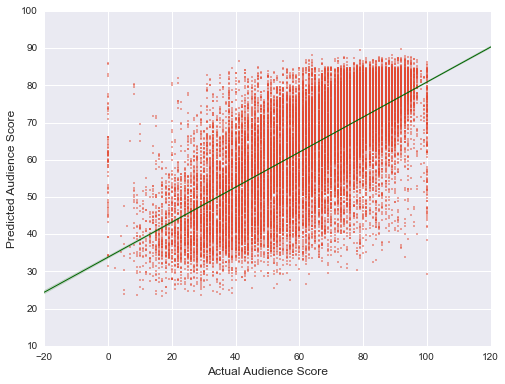

In [215]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

df_for_seaborn = pd.DataFrame(zip(y1['Q("Audience Score")'], results1.predict()),
                               columns = ['Actual Audience Score', 'Predicted Audience Score'])

sns.regplot(x='Actual Audience Score', y='Predicted Audience Score', data= df_for_seaborn, scatter_kws={'s':3},
            line_kws = { "color": "darkgreen", "linewidth":1})

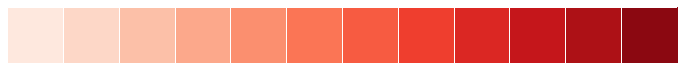

In [320]:
reds = sns.choose_colorbrewer_palette('sequential')

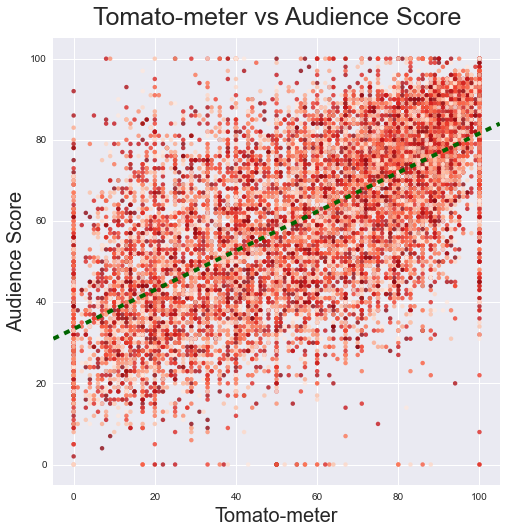

In [322]:
sns.set_style("darkgrid")

plt.figure(figsize=(8, 8))
plt.title("Tomato-meter vs Audience Score", fontsize = 25, y= 1.02)

ax = sns.regplot(x="Tomato-meter", y="Audience Score", data=bigbadpanda,fit_reg = False,
                 color = reds)
ax.set_xlim(-5,105)
ax.set_xlabel("Tomato-meter", fontsize = 20)
ax.set_ylim(-5,105)
ax.set_ylabel("Audience Score", fontsize = 20)
ax.plot([-5,105], [31,84], ls = "--", linewidth = 4, c= 'darkgreen')
plt.savefig("Total_Tom_vs_Aud_Scatter.png")

In [255]:
print bigbadpanda.head()

                                              Actors  Audience Score  \
0  ( William Powell,  Myrna Loy,  Maureen O'Sulli...              94   
1  ( Jake T. Austin,  Raven,  Whoopi Goldberg,  R...              45   
2  ( Elina Löwensohn,  Olivier Gourmet,  Jonathan...              61   
3  ( Matti Pellonpää,  Kari Väänänen,  Jim Jarmus...              86   
4  ( Juliette Binoche,  Nikolaj Coster-Walda..., ...              65   

                Director                                             Genres  \
0          W.S. Van Dyke             (Mystery & Suspense, Classics, Comedy)   
1      Christopher Reeve  (Action & Adventure, Animation, Kids & Family,...   
2         Abdel Kechiche                 (Art House & International, Drama)   
3         Aki Kaurismäki  (Drama, Action & Adventure, Musical & Performi...   
4  Nikolaj Coster-Waldau                                           (Drama,)   

                           Movie Title  Tomato-meter  Year  Rating Diff  
0                 